# Kullback Leilber divergence
based on [this](https://machinelearningmastery.com/divergence-between-probability-distributions/)

```nn.KLDivLoss``` is the pytorch implementation of the *Kullback-Leibler divergence $D_{KL}$* loss measure. Kullback-Leibler divergence is a measure of how one probability distribution is different from a second, reference probability distribution  
Notation: $KL(P||Q)$ represents the Kullback Leilber divergence from Q (model) to P (true distribution)

In [3]:
### Kullback Leibler divergence
```nn.KLDivLoss``` is the pytorch implementation of the *Kullback-Leibler divergence $D_{KL}$* loss measure. Kullback-Leibler divergence is a measure of how one probability distribution is different from a second, reference probability distribution  
Notation: $KL(P||Q)$ represents the Kullback Leilber divergence from Q (model) to P (true distribution)

SyntaxError: invalid syntax (<ipython-input-3-ebffec50342f>, line 2)

In [5]:
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

P=1.000 Q=1.000


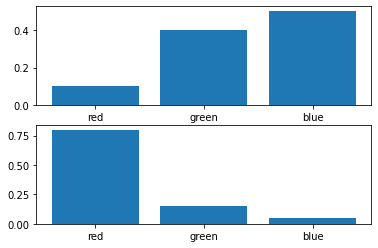

In [6]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [11]:
# calculate the kl divergence
import math
def kl_divergence(p, q):
	return sum(p[i] * math.log2(p[i]/q[i]) for i in range(len(p)))

In [12]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


# Jensen Shannon divergence

The Jensen-Shannon divergence, or JS divergence for short, is another way to quantify the difference (or similarity) between two probability distributions.

It uses the KL divergence to calculate a normalized score that is symmetrical. This means that the divergence of P from Q is the same as Q from P, or stated formally:

JS(P || Q) == JS(Q || P)
The JS divergence can be calculated as follows:

JS(P || Q) = 1/2 * KL(P || M) + 1/2 * KL(Q || M)
Where M is calculated as:

M = 1/2 * (P + Q)
And KL() is calculated as the KL divergence described in the previous section.

It is more useful as a measure as it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different), when using the base-2 logarithm.

The square root of the score gives a quantity referred to as the Jensen-Shannon distance, or JS distance for short.

We can make the JS divergence concrete with a worked example.

First, we can define a function to calculate the JS divergence that uses the kl_divergence() function prepared in the previous section.

In [13]:
# example of calculating the js divergence between two mass functions
from math import log2
from math import sqrt
from numpy import asarray

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 * (p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

# define distributions
p = asarray([0.10, 0.40, 0.50])
q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648
